# ML-Minor-May


### Objective of this Analysis:

To understand the how the student's performance (test scores) is affected by the other variables (Gender, Ethnicity, Parental level of education, Lunch, Test preparation course).



### To do in  Exploratory Data Analysis:
* To Analyse insights in the data set.
* To understand the connection between the variables and to uncover the underlying structure
* To extract the important Variables.
* To test the underlying assumptions.
* Provide Insights with Suitable Graphs and Visualizations.
* Write all your inferences with supporting Analysis and Visualizations.

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [169]:
data = pd.read_csv(r'C:\Users\lenovo\Downloads\StudentsPerformance.csv')

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Here this shows the names of rows and columns, which are given in our data sheet

In [171]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [172]:
data.shape
(1001, 8)

(1001, 8)

In [173]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Here we check if there are any missing values. In case we have any missing values we fill those spaces with fillna()

In [139]:
le=preprocessing.LabelEncoder()
data['gender']=le.fit_transform(data['gender'])

In [121]:
le=preprocessing.LabelEncoder()
data['race/ethnicity']=le.fit_transform(data['race/ethnicity'])

In [122]:
le=preprocessing.LabelEncoder()
data['parental level of education']=le.fit_transform(data['parental level of education'])
le=preprocessing.LabelEncoder()
data['lunch']=le.fit_transform(data['lunch'])
le=preprocessing.LabelEncoder()
data['test preparation course']=le.fit_transform(data['test preparation course'])

In [152]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Basically variables are of two types
1) Categorical variables: contains discription of groups
2) Numerical variables: contains number of values

from the above output we can observe that
gender,race,parental level of education,lunch,test preperations come under categorical variables where as readind,writing,math score comes under numerical variable

In [174]:
data['total'] = data['math score'] + data['writing score'] + data['reading score']
data['average'] = data['total'] / 3

# Plotting the graph

From here we will start plotting the graphs
firstly we will plot the graphs of the scores

## Math Score

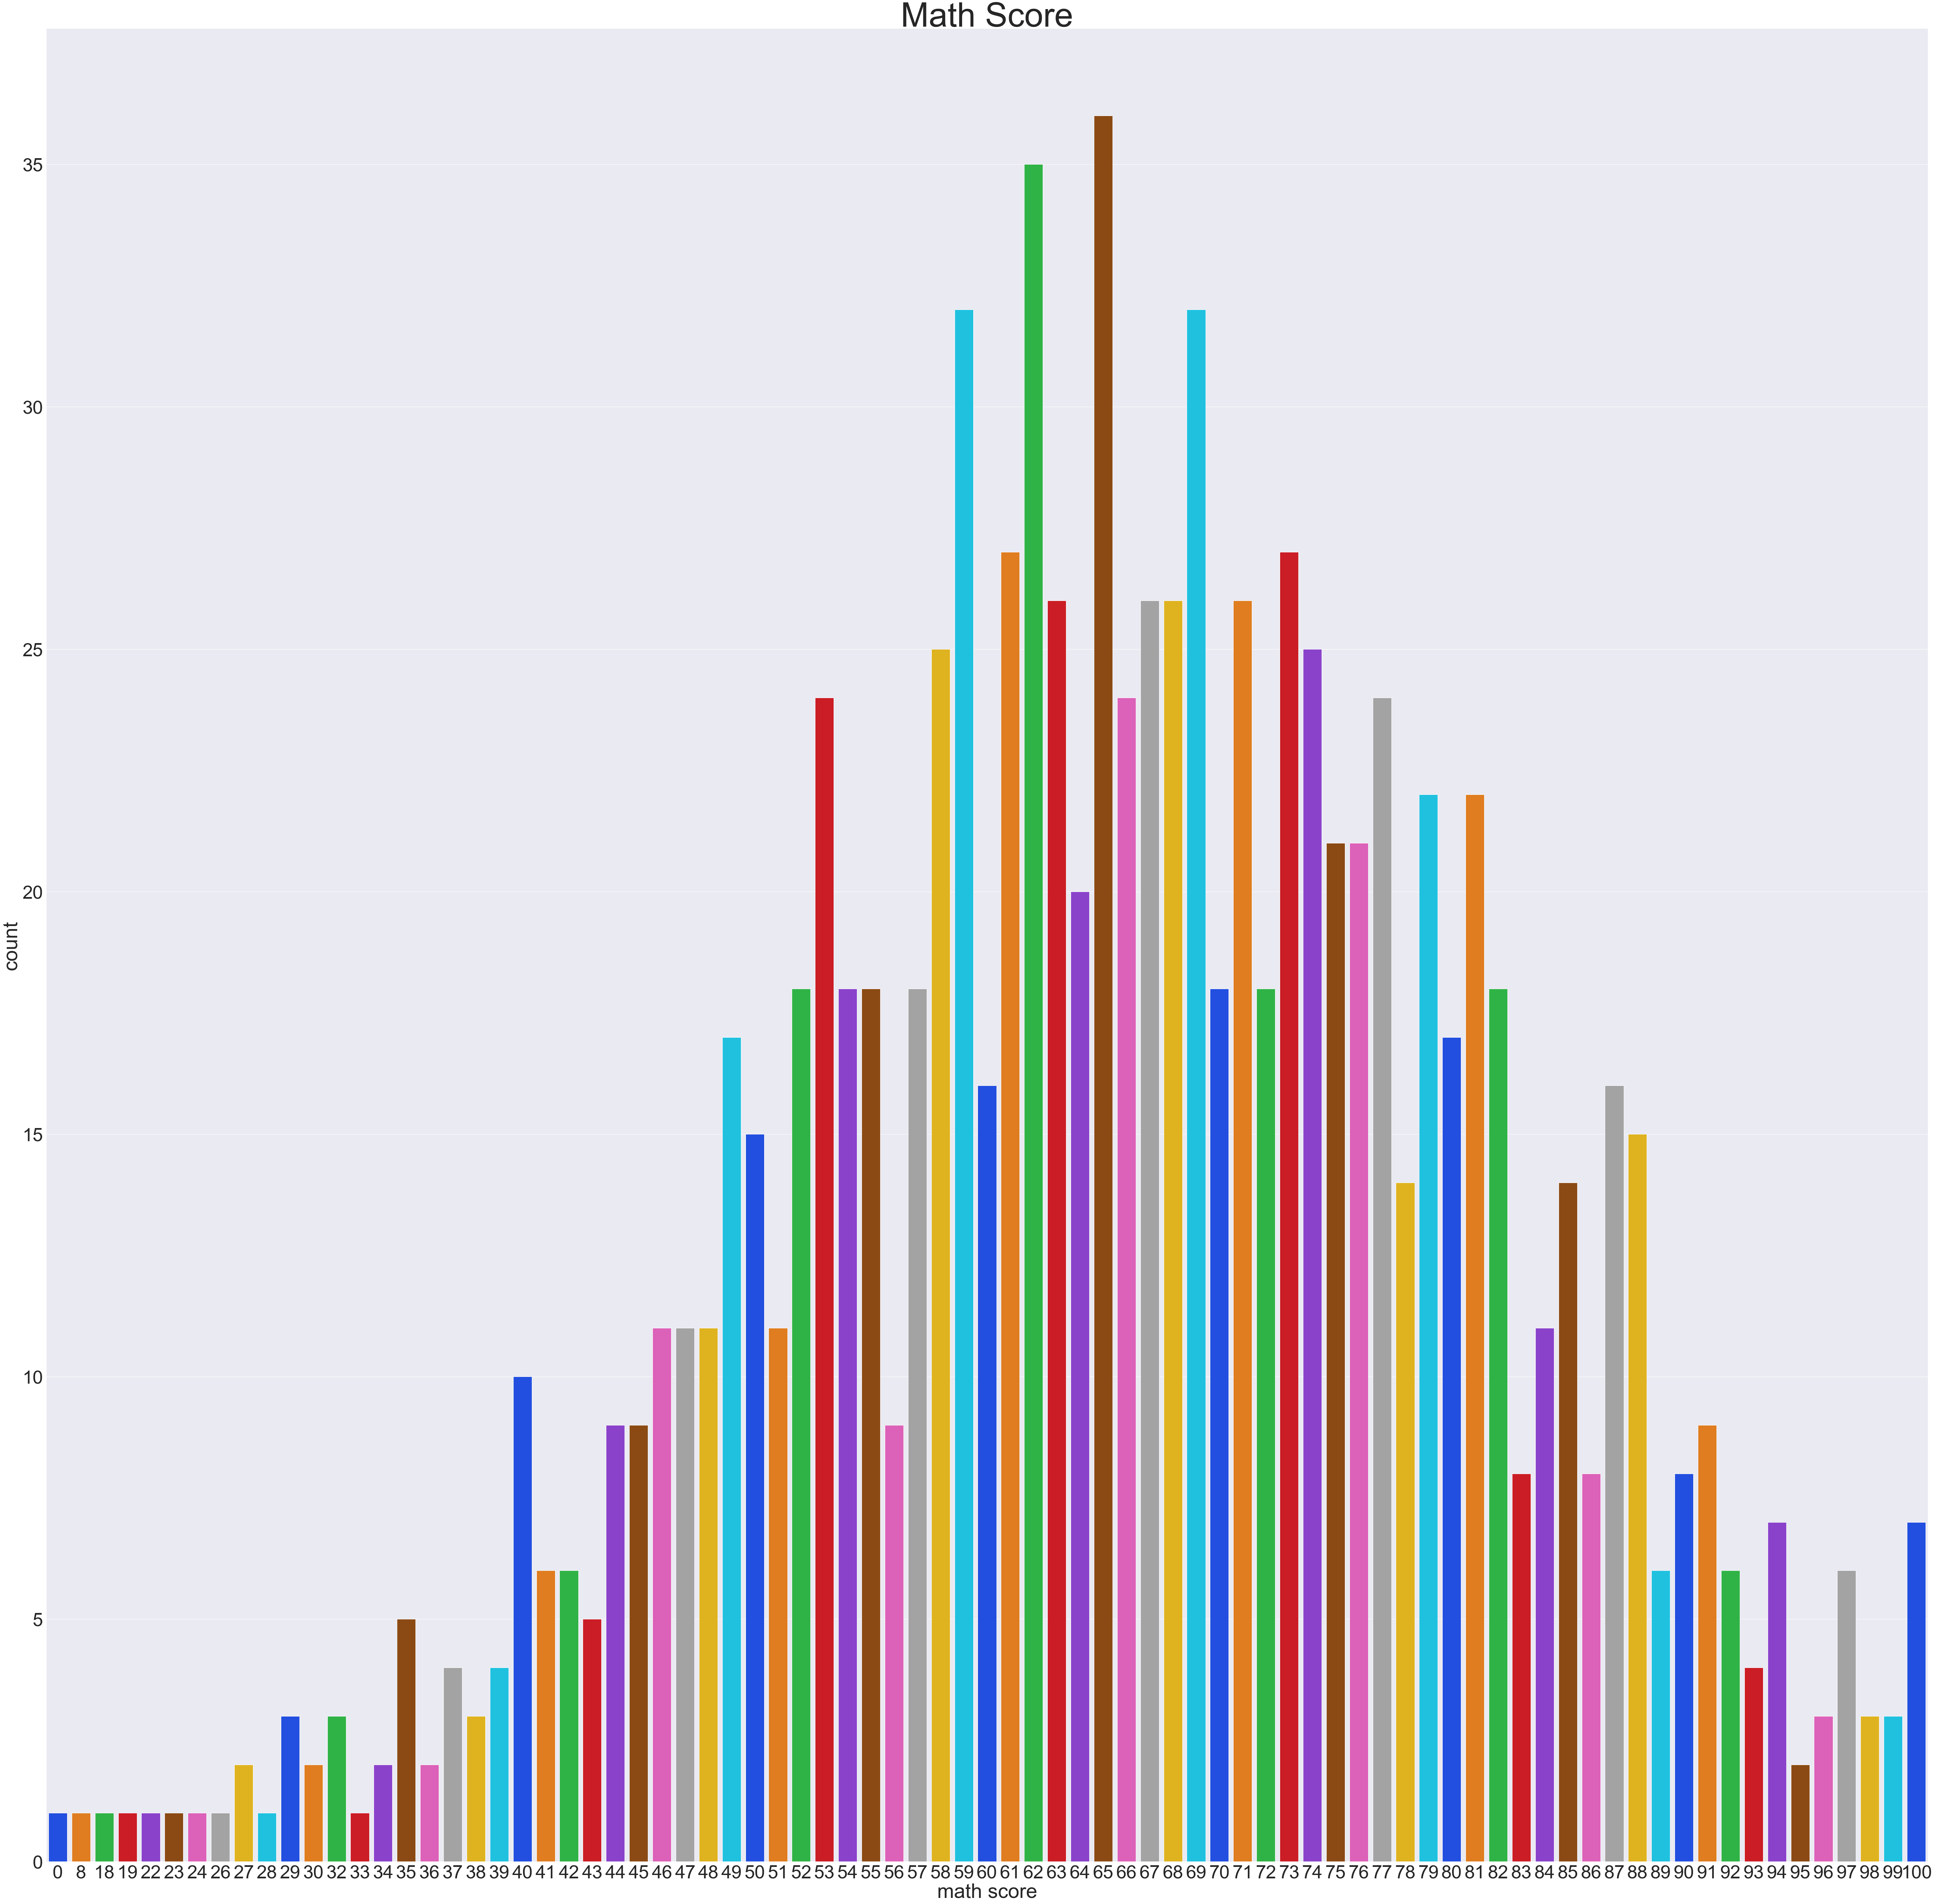

In [223]:
plt.rcParams['figure.figsize'] = (100, 100)
sns.countplot(data['math score'], palette = 'bright')
plt.title('Math Score',fontsize = 100)
plt.show()

*This bar graph shows the math score*

## Writing Score

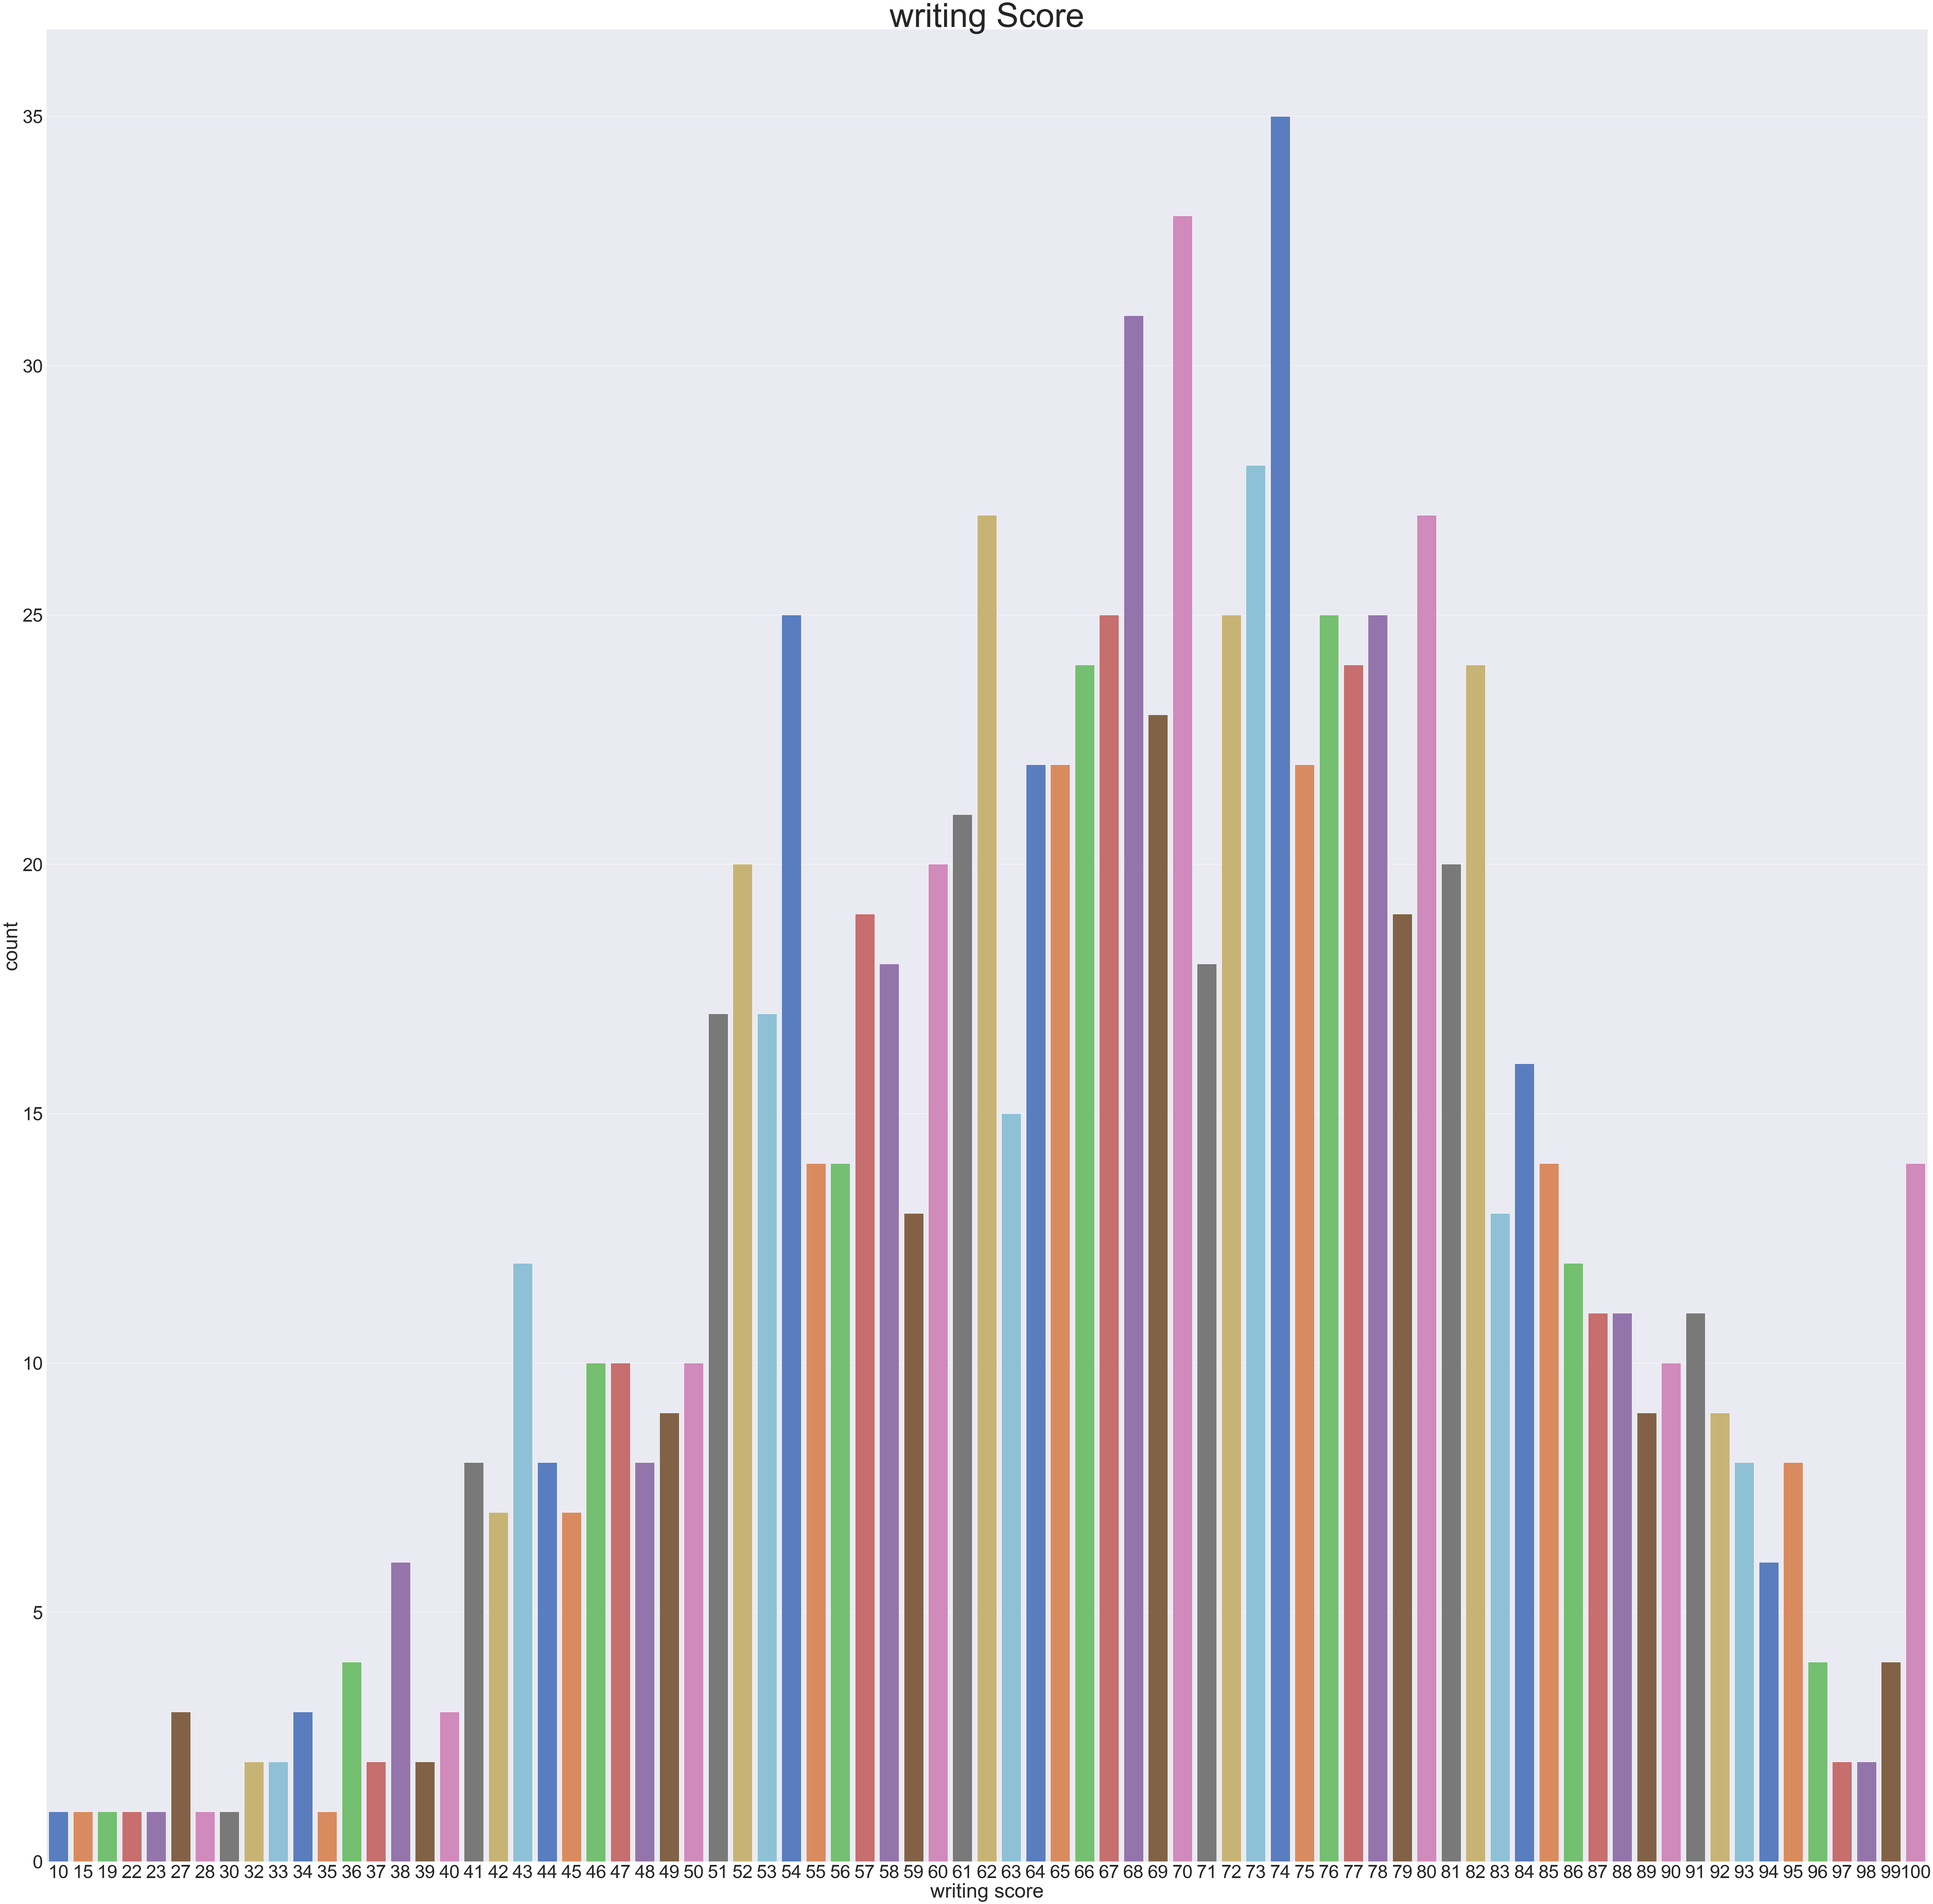

In [224]:
plt.rcParams['figure.figsize'] = (100, 100)
sns.countplot(data['writing score'], palette = 'muted')
plt.title('writing Score',fontsize = 100)
plt.show()

*This bar graphs shows the writing score*

# Reading score


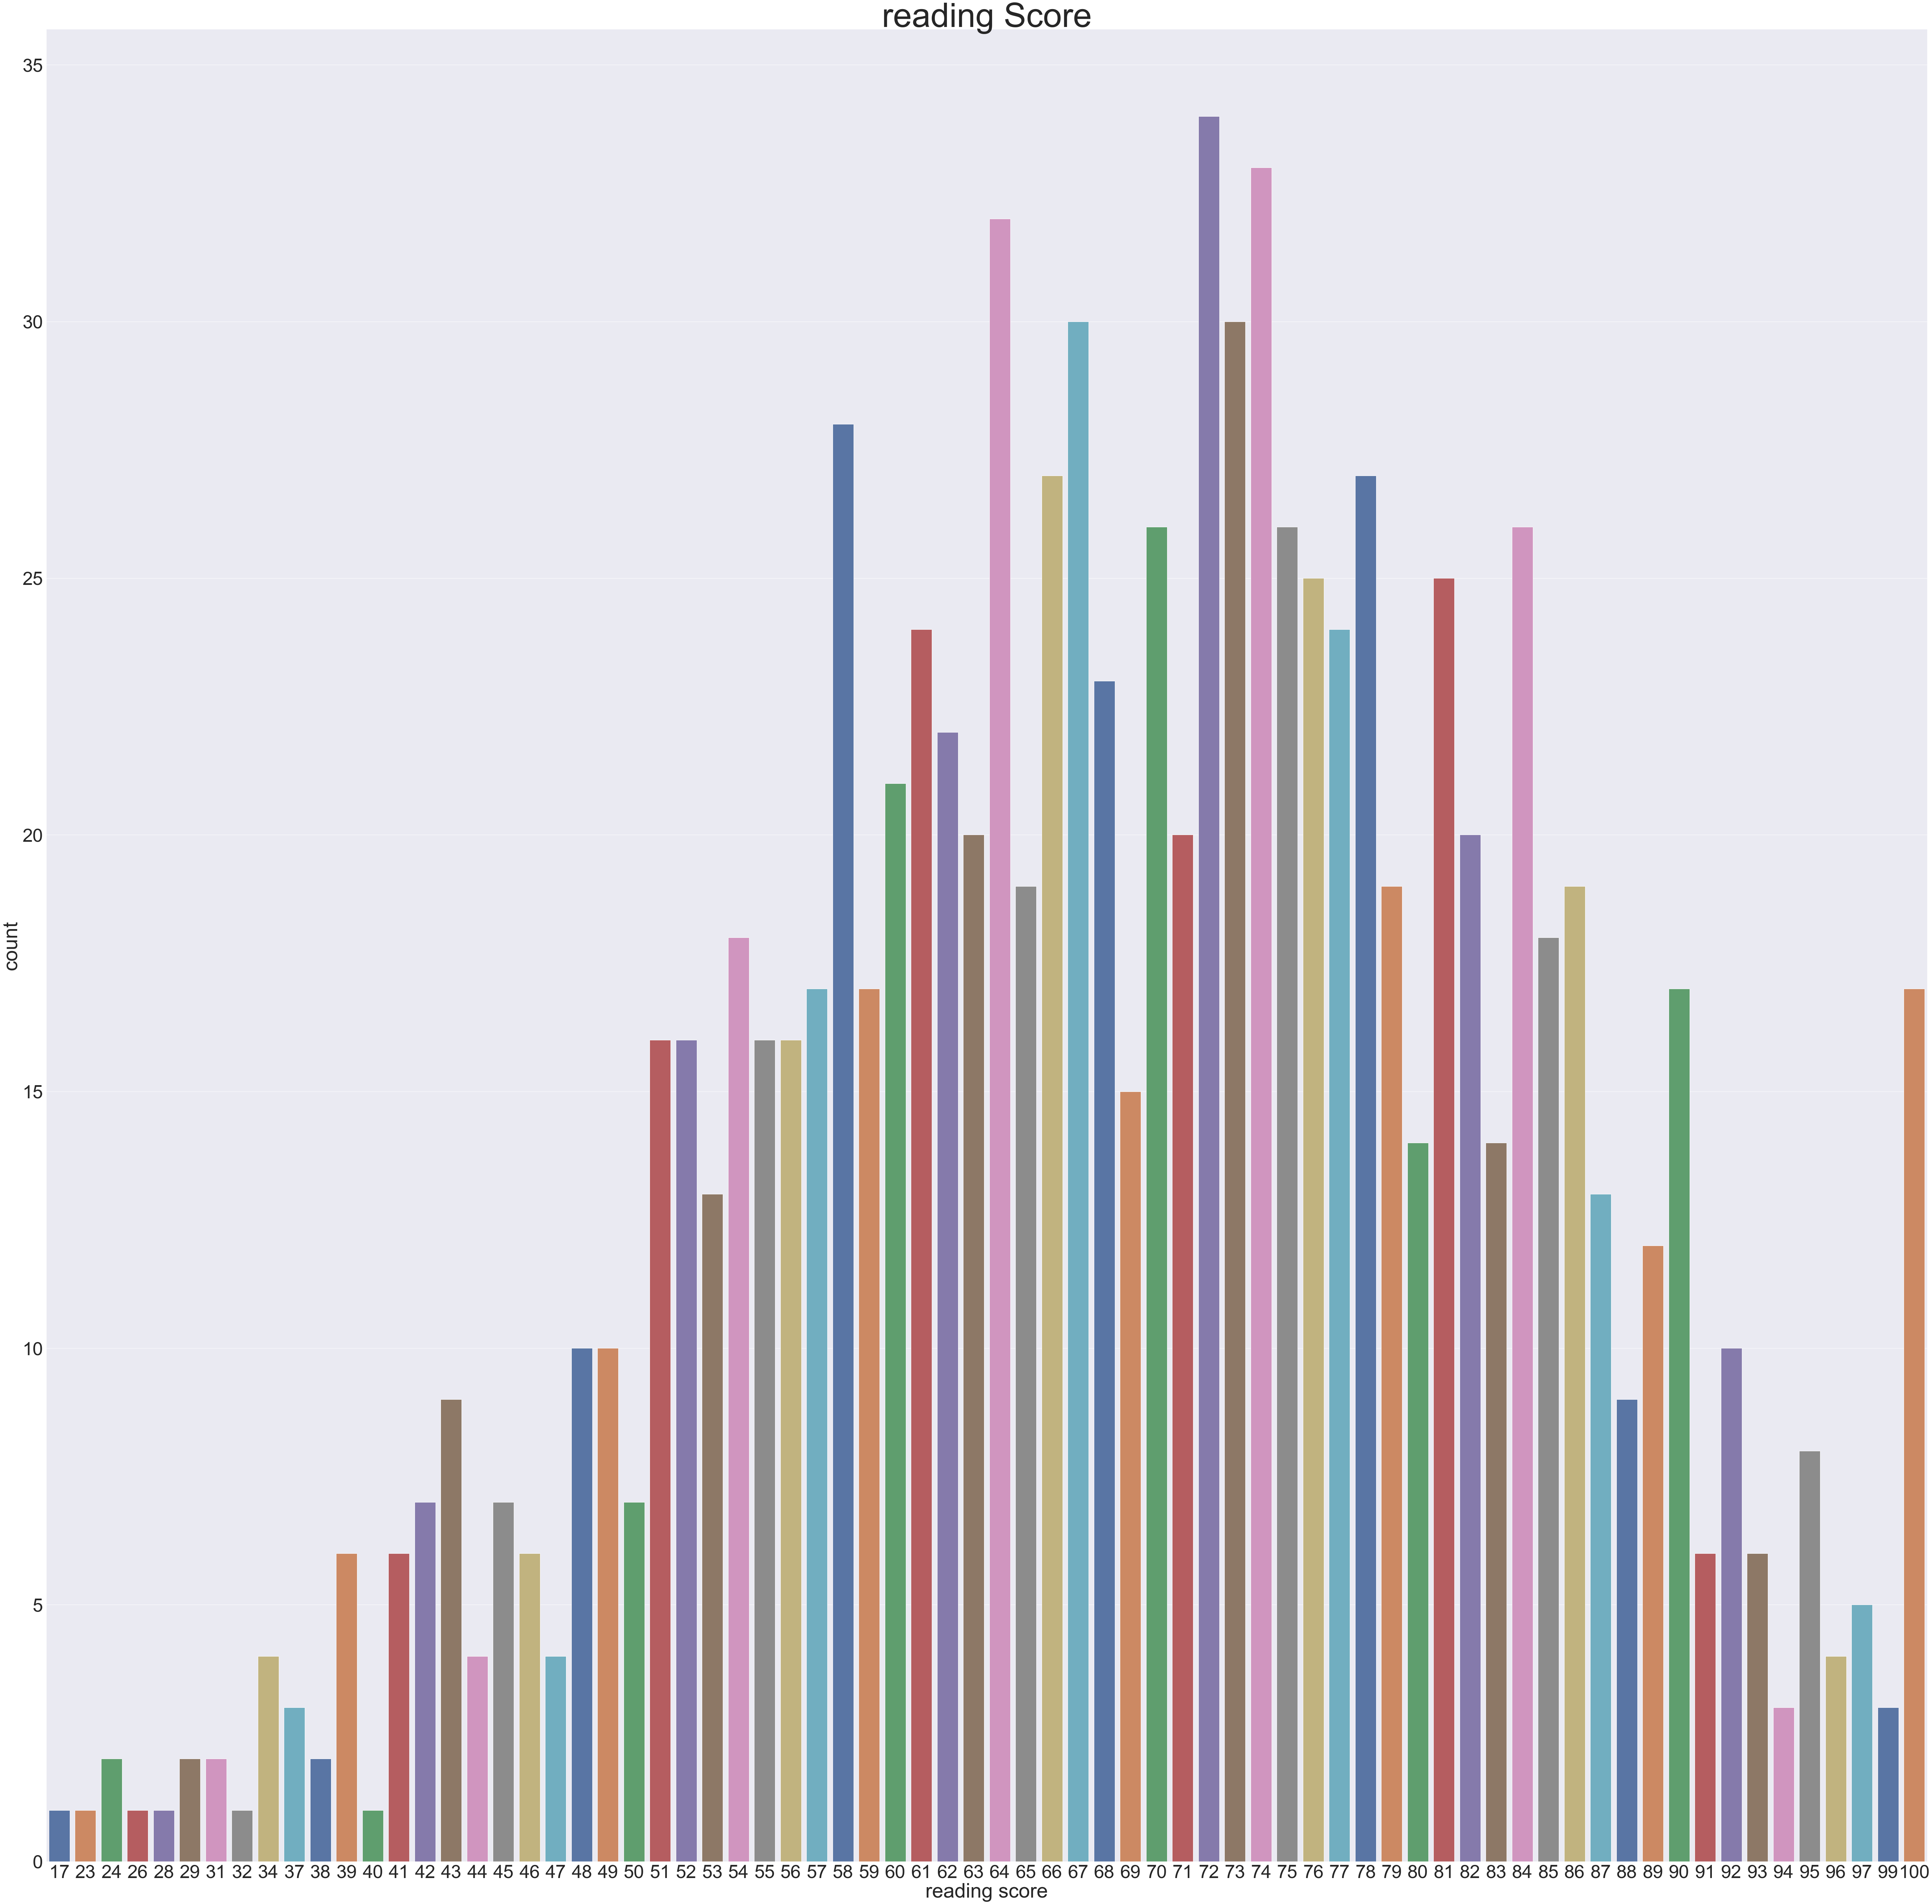

In [225]:
plt.rcParams['figure.figsize'] = (100, 100)
sns.countplot(data['reading score'], palette = 'deep')
plt.title('reading Score',fontsize = 100)
plt.show()

*this bar graph shows the reading score*

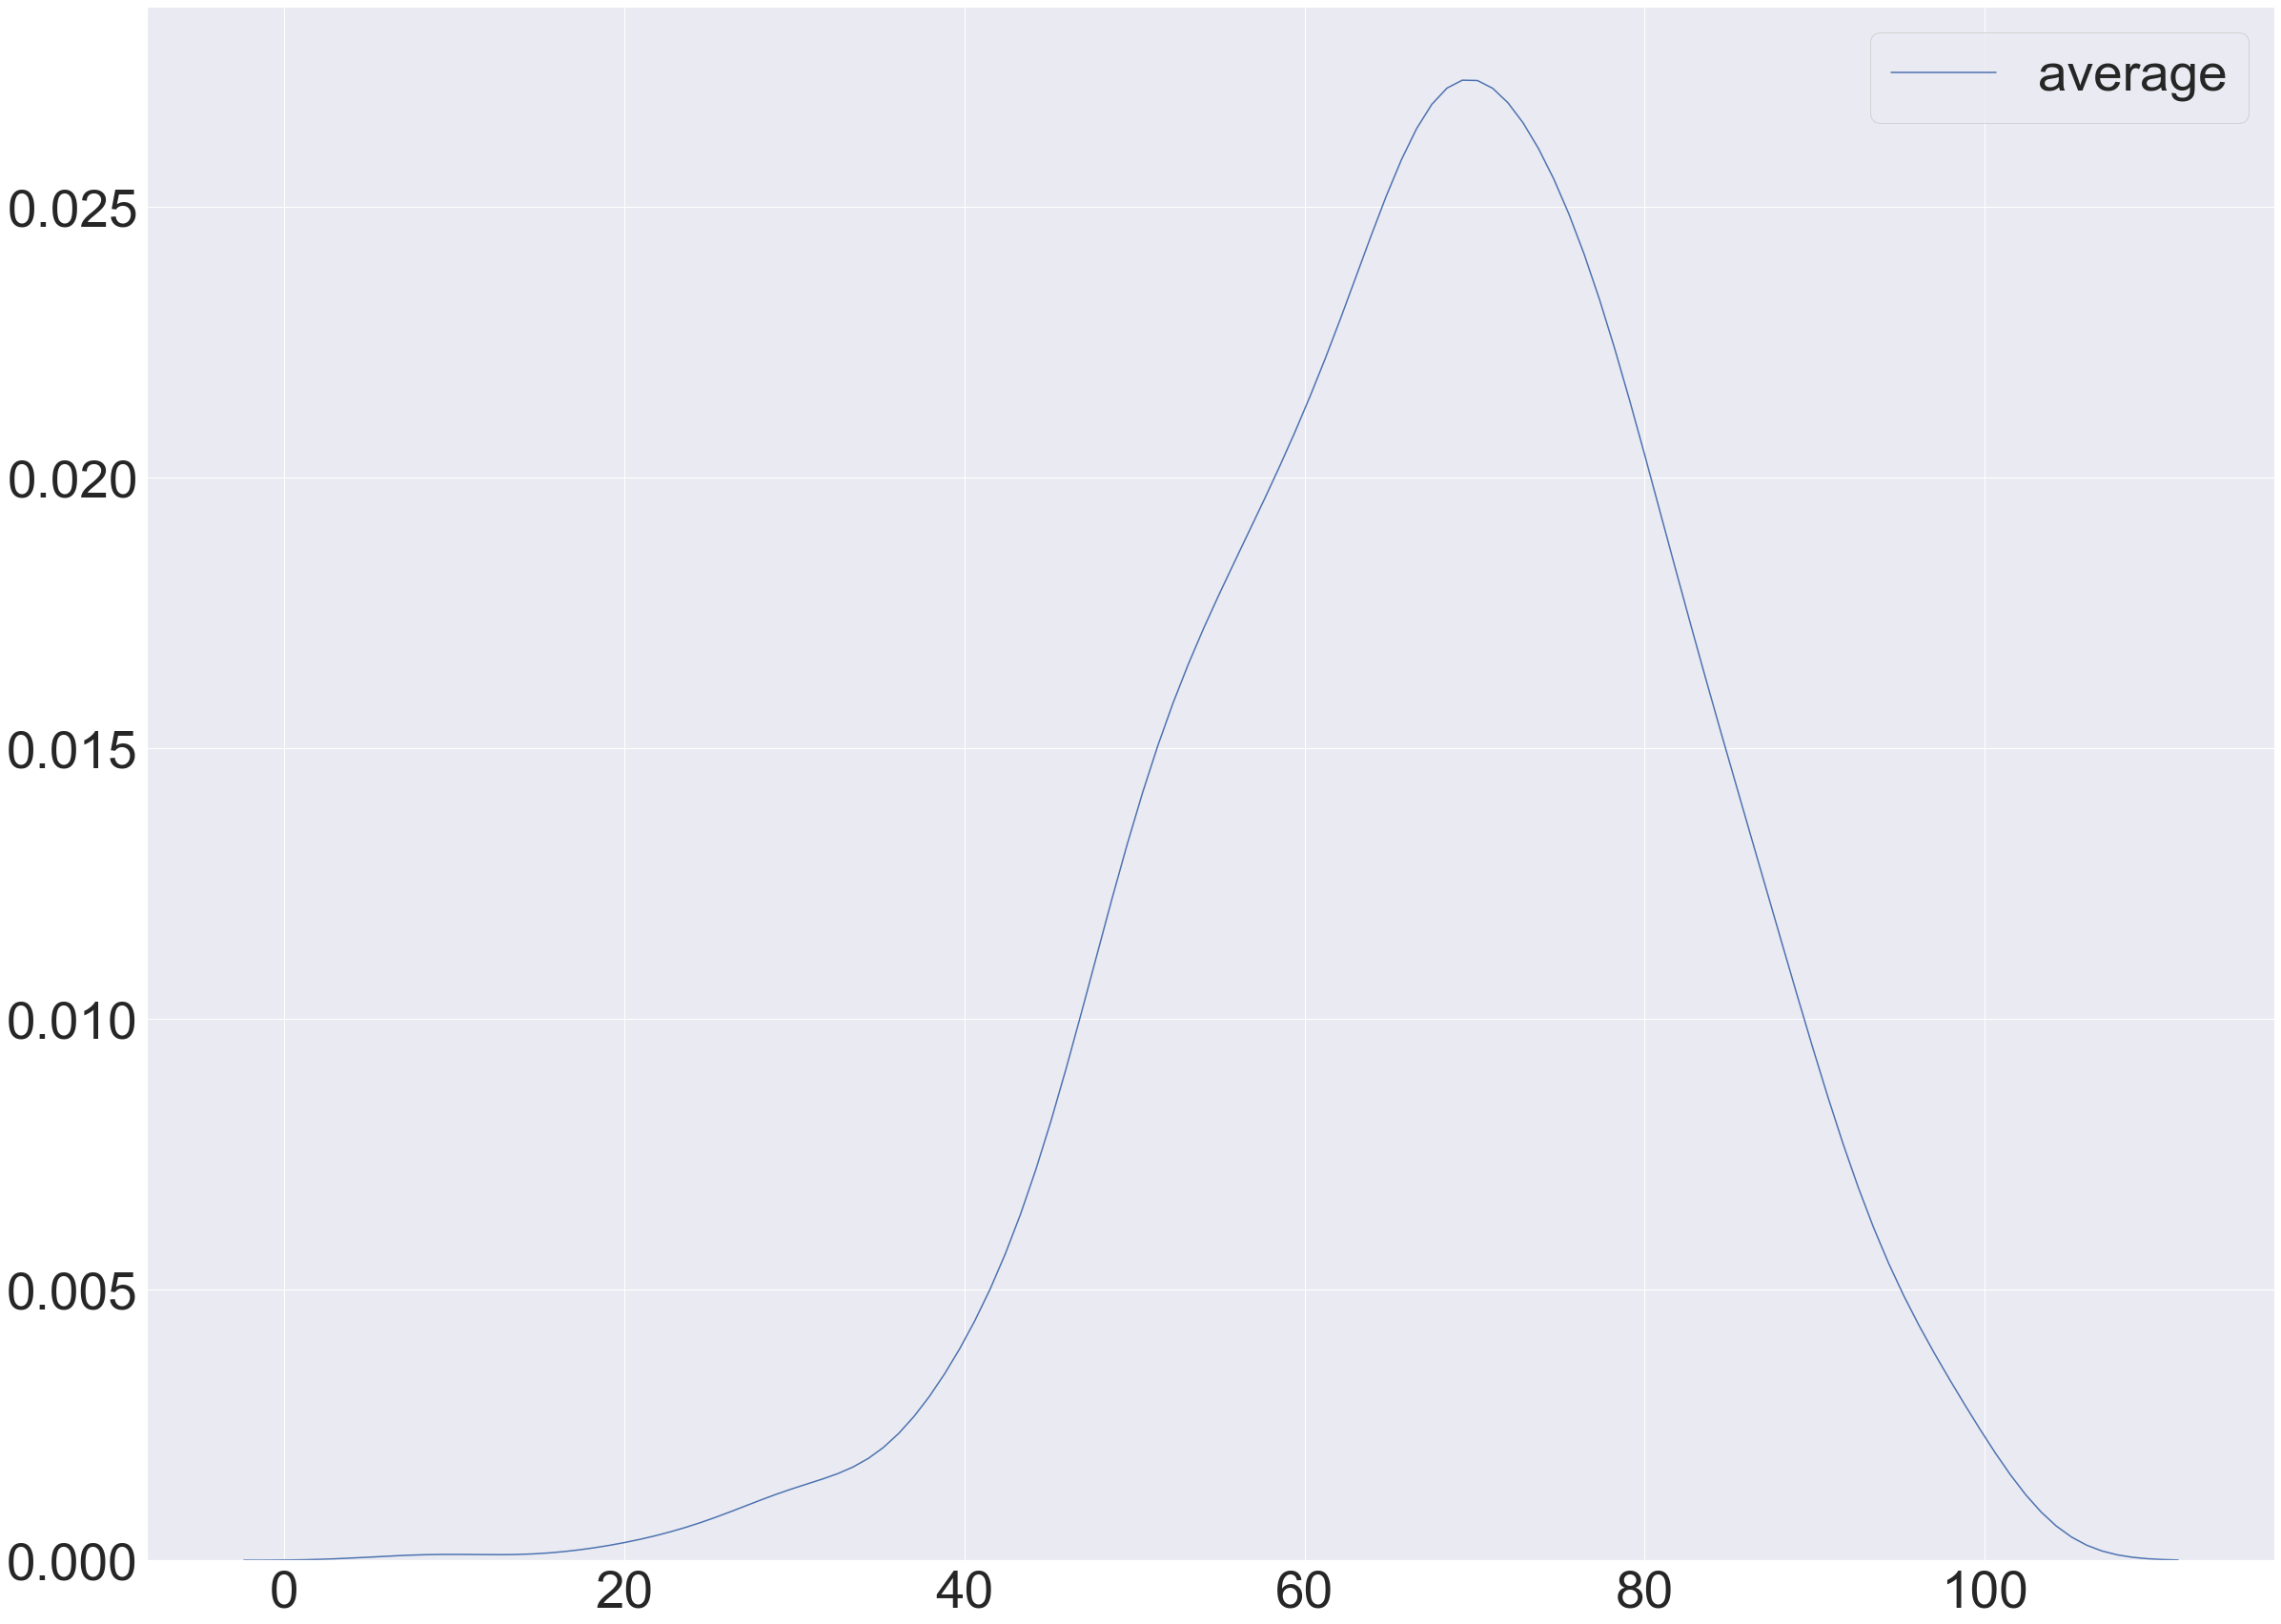

In [178]:
sns.kdeplot(data['average'])

This graph shows the average of math,reading and writing score

Now we will compare two variables
.Here we will compare Gender and Average of the scores

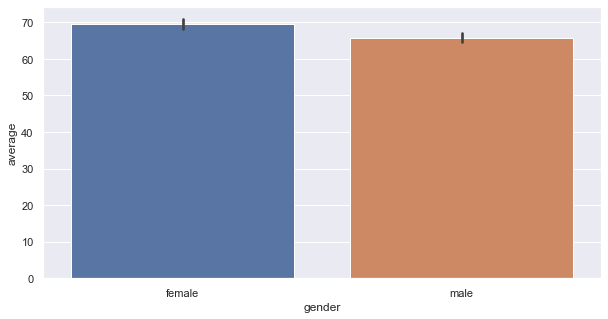

In [241]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.set(font_scale=1) 
sns.barplot(data['gender'], data['average'])

From the above graph we can say the average score is more for females than male

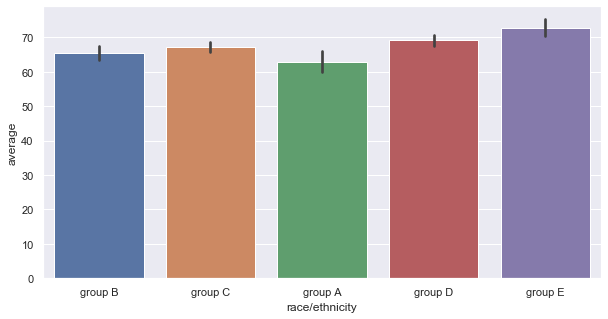

In [242]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.set(font_scale=1)  
sns.barplot(data['race/ethnicity'], data['average'])

From the above graph it is clear that average marks scored by Group E is highest of all then comes Group D and Group C

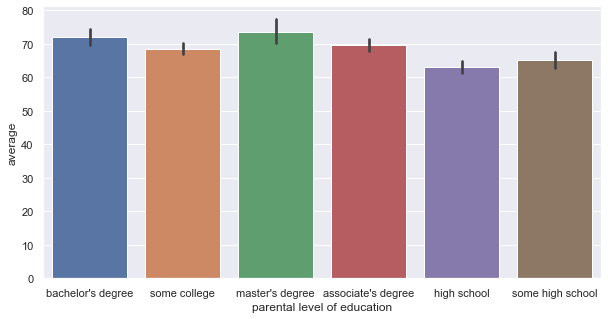

In [243]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.set(font_scale=1)   
sns.barplot(data['parental level of education'], data['average'])

From the graph we can observe that students with parents with Master's degree of educations scored max of the average marks, then comes Bachelor's degree an Associate degree

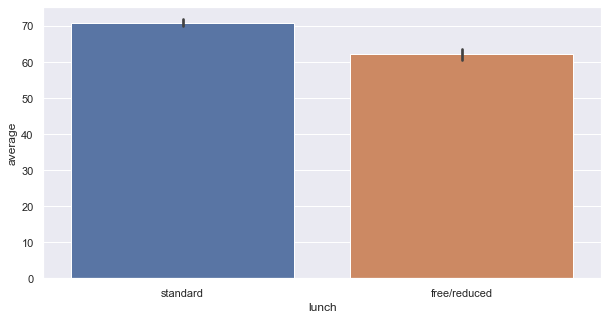

In [244]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.set(font_scale=1) 
sns.barplot(data['lunch'], data['average'])

From the above graph the students who take standard lunch has  more average score than students with free/reduced luch

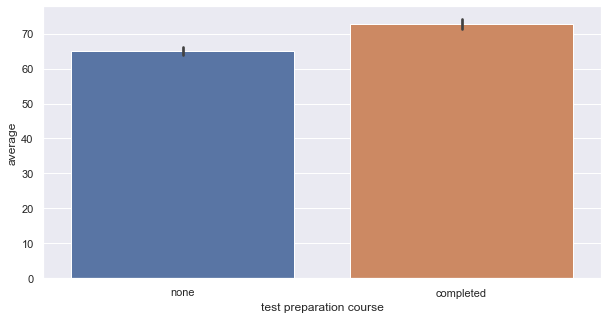

In [245]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.set(font_scale=1)  
sns.barplot(data['test preparation course'], data['average'])

From the above graph we can observe that maximum of the students have completed the test preparation course on average

### Observations:
from the above graphs we can say that
* The proportions of male and female are almost same, but female has the highest
* Most of the students belong to either Group D or Group c
* Most of the students have standard lunch
* Highest proportion of parent level education is Master's degree then comes Bachelor's degree an Associate degree

Now we look at the scores sepertly

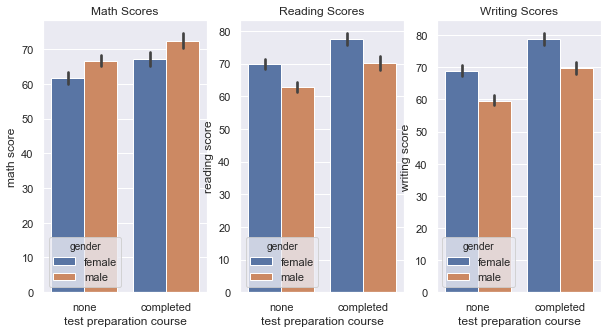

In [246]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.set(font_scale=1) 
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(hue="gender", y="math score", x="test preparation course", data=data)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(hue="gender", y="reading score", x="test preparation course", data=data)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(hue="gender", y="writing score", x="test preparation course", data=data)
plt.show()

We can see that maximum female students completed the course in math but where as the maximum of the male students completed the course than that of female students in both reading and writing


Now lets take a look at the students of each race/ethnicity

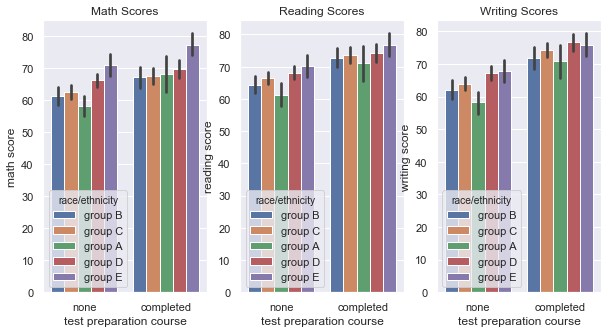

In [247]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.set(font_scale=1) 
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(hue="race/ethnicity", y="math score", x="test preparation course", data=data)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(hue="race/ethnicity", y="reading score", x="test preparation course", data=data)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(hue="race/ethnicity", y="writing score", x="test preparation course", data=data)
plt.show()

From above graph we can see that students from group E completed course more than other groups in both math and reading. But in writing score group D students completed more than E.
We can also observe that none course are more in both math and reading of students belonging to Group E ,where as in writing both students of Group D and E are almost same being the hightest


now lets take a look at Lunch

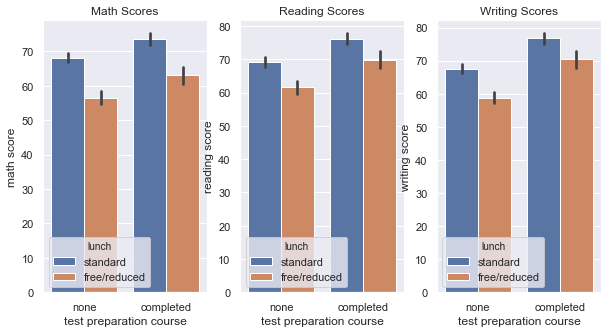

In [248]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.set(font_scale=1) 
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(hue="lunch", y="math score", x="test preparation course", data=data)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(hue="lunch", y="reading score", x="test preparation course", data=data)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(hue="lunch", y="writing score", x="test preparation course", data=data)
plt.show()

From the graph we can students with standart lunch completed the course more than students with free/reduced
we can also see that even the students with standard food are highest in not completing the course too.


Now lets look at parental level of education

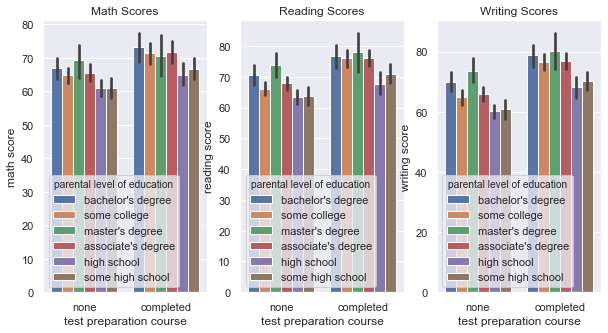

In [249]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.set(font_scale=1) 
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(hue="parental level of education", y="math score", x="test preparation course", data=data)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(hue="parental level of education", y="reading score", x="test preparation course", data=data)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(hue="parental level of education", y="writing score", x="test preparation course", data=data)
plt.show()

From above we can see that students whose parental level education is Master's degree have finished the course in reading and writing, where as for math it is students whose parental level education is bachelor's degree


Now lets see relation between test preparation and other variables

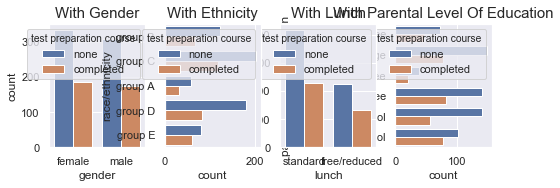

In [250]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.set(font_scale=1) 
plt.subplot(251)
plt.title('With Gender',fontsize = 15)
sns.countplot(hue="test preparation course", x="gender", data=data)
plt.subplot(254)
plt.title('With Parental Level Of Education',fontsize = 15)
sns.countplot(hue="test preparation course", y="parental level of education", data=data)
plt.subplot(253)
plt.title('With Lunch',fontsize = 15)
sns.countplot(hue="test preparation course", x="lunch", data=data)
plt.subplot(252)
plt.title('With Ethnicity',fontsize = 15)
sns.countplot(hue="test preparation course", y="race/ethnicity", data=data)
plt.show()

### Observation:

* Most of the students didnt complete the test preparation course
* Maximum of the students belong to Group C
* Students taking Standard Lunch have compeleted the course
* Students with parental level of education is some college is hightest then comes associte's degree and high school

Now lets look at the grades of each variable score

In [194]:
data['percentage%']=data['total']/300*100
def grade(scores):
    if scores >= 85 and scores <= 100:
        return 'Grade A'
    elif scores >= 70 and scores < 85:
        return 'Grade B'
    elif scores >= 55 and scores < 70:
        return 'Grade C'
    elif scores >= 35 and scores < 55:
        return 'Grade D'
    elif scores >= 0 and scores < 35:
        return 'Grade E'
    
data['grade']=data['percentage%'].apply(grade)

Grading is given in the following way:

100-85:Grade A
70-84: Grade B
69-55: Grade C
54-35: Grade D
35-0: Grade E


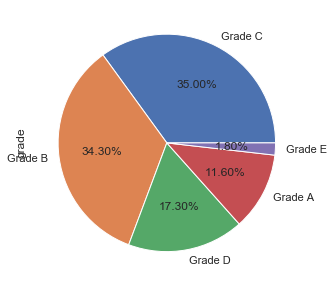

In [251]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.set(font_scale=1) 
data['grade'].value_counts().plot.pie(autopct="%1.2f%%")
plt.show()

From the above pie chart it is clear that most of the students got Grade C and Grade B


Now lets analyse the relationship with Grade and other variables

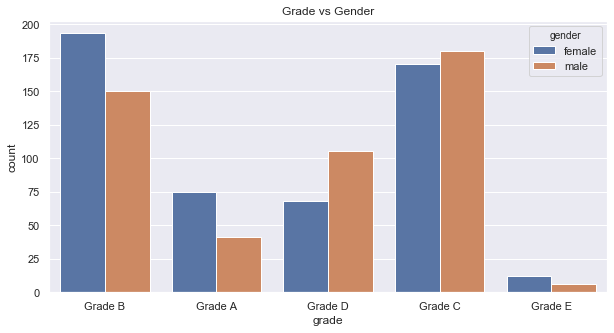

In [253]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.set(font_scale=1) 
plt.title('Grade vs Gender')
sns.countplot(hue="gender", x="grade", data=data)
plt.show()

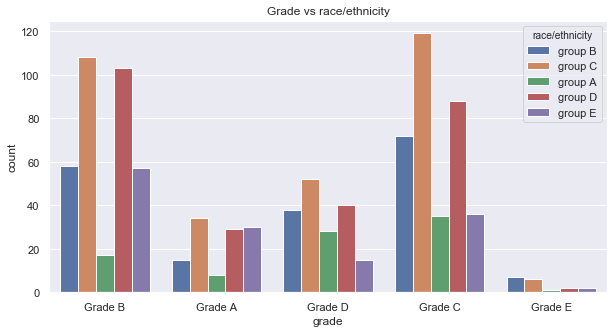

In [254]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.set(font_scale=1) 
plt.title('Grade vs race/ethnicity')
sns.countplot(hue="race/ethnicity", x="grade", data=data)
plt.show()

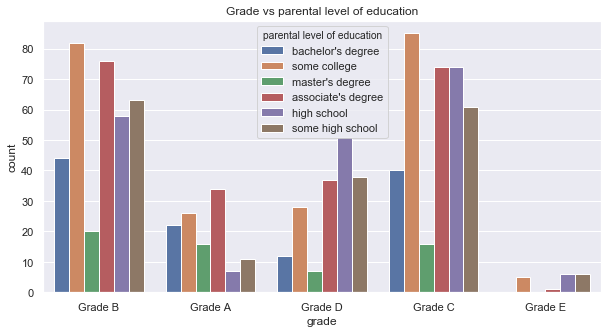

In [255]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.set(font_scale=1) 
plt.title('Grade vs parental level of education')
sns.countplot(hue="parental level of education", x="grade", data=data)
plt.show()

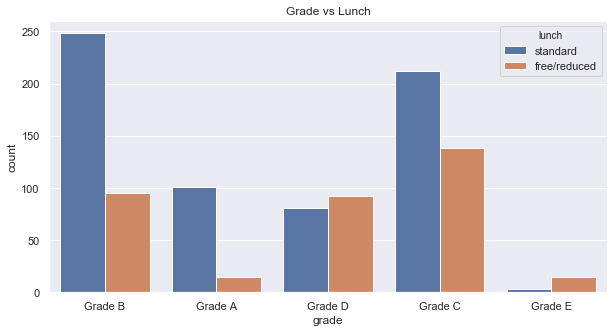

In [256]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.set(font_scale=1) 
plt.title('Grade vs Lunch')
sns.countplot(hue="lunch", x="grade", data=data)
plt.show()

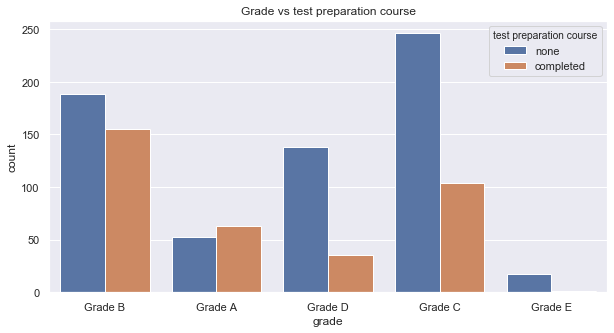

In [257]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.set(font_scale=1) 
plt.title('Grade vs test preparation course')
sns.countplot(hue="test preparation course", x="grade", data=data)
plt.show()

From the above graphs and observations it clearly shows how the student's performance (test scores) is affected by the other variables (Gender, Ethnicity, Parental level of education, Lunch, Test preparation course).